<a href="https://colab.research.google.com/github/MatheusOrange211/Bootcamp-Alura/blob/main/SERIES_TEMPORAIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📙 **MÓDULO 4 - ANÁLISE DE SÉRIES TEMPORAIS USANDO O DATASUS**
---

#importação dos dados e bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime

# sns.set() #transformar o plot no formato de seaborn

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv"

#O que são séries temporais?

Em estatística, econometria, matemática aplicada e processamento de sinais, uma série temporal é uma coleção de observações feitas sequencialmente ao longo do tempo.

In [3]:
dados_temporais = pd.read_csv(url,encoding="ISO-8859-1",sep=";",skiprows=3,skipfooter=17,engine='python')
dados_temporais.drop("Total",axis=1,inplace=True)
dados_temporais

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


## 📗 AULA 4 - DESAFIO 01 :Transformar os dados em uma série temporal Ano-Mês



A ideia é criar, a partir do dataset original um novo dataframe no estilo ano-mês.

````
ano-mes | valor
2015.1  | 4895
2015.2  | 8952
2015.3  | 2435
2015.4  | 9390
````

Para isso, primeiro copiamos o dataframe diretamente da url, removemos o campo de total que não será necessário e assim temos os dados originais

In [4]:
dados_temporais_desafio = pd.read_csv(url,encoding="ISO-8859-1",sep=";",skiprows=3,skipfooter=17,engine='python')
dados_temporais_desafio = dados_temporais_desafio.drop("Total",axis=1)
dados_temporais_desafio = dados_temporais_desafio.set_index("Ano Diagnóstico")
dados_temporais_desafio.head()

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Ano Diagnóstico,,,,,,,,,,,,
2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541


Foi criado então duas variáveis com **list comprehension**. Na `ano_mes` concatenamos os anos com os meses, formando `2007.1` (preferi transformar os nomes dos meses em números mesmo, por isso o uso do `range`no laço `for` *j*).

<br>
Crio então, uma segunda list comprehension que comportará nossa matriz de valores. Os dois laços `for`criarão a seguinte combinação:

onde temos que :
* i para as linhas;
* j para as colunas

Para sabermos quantas linhas temos, basta dar um `len(dados_temporais_desafio.values)` . Para saber as colunas, pegamos a primeira linha, e lemos seu comprimento:
`len(dados_temporais_desafio.values[0])`. Assim no laço temos:

```
dados_temporais_desafio.value[i][j]
```




In [5]:
ano_mes = [ f"{i}.{j}"for i in dados_temporais_desafio.index
                      for j in range(1,len(dados_temporais_desafio.columns)+1)]

valores =  [dados_temporais_desafio.values[i][j] for i in range(0,len(dados_temporais_desafio.values))
                                                 for j in range(0,len(dados_temporais_desafio.values[0]))]



`ano_mes` e `valores` tem os mesmo valores de comprimento. Logo, deu tudo certo, e cada valor está no seu respectivo ano-mês dado a forma como construimos. Agora basta criar duas colunas em novo dataframe e adiciona nossas listas.

In [6]:
print(len(ano_mes),len(valores))

228 228


In [7]:
dataframe_solucao = pd.DataFrame([])

dataframe_solucao["ano_mes"] = ano_mes
dataframe_solucao["ano_mes_valores"] = valores

In [8]:
dataframe_solucao

,ano_mes,ano_mes_valores
0,2001.1,8088
1,2001.2,6542
2,2001.3,8095
3,2001.4,7305
4,2001.5,7656
...,...,...
223,2019.8,8239
224,2019.9,8143
225,2019.10,8592
226,2019.11,7615


## 📒 AULA 4 - SOLUÇÃO 01 :Transformar os dados em uma série temporal Ano-Mês

uma outra forma de também fazer


In [9]:
dados_st_solucao = dados_temporais.melt(id_vars="Ano Diagnóstico",value_name="Casos",var_name="Mês")
dados_st_solucao["Data"] = dados_st_solucao["Ano Diagnóstico"].apply(str) + "-"+ dados_st_solucao["Mês"]
dados_st_solucao

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


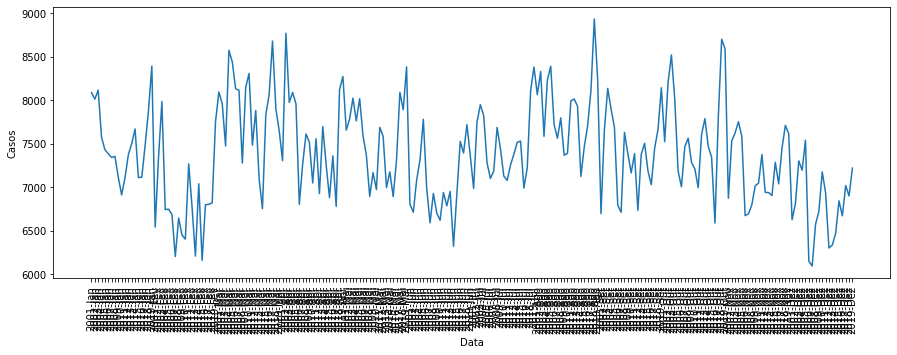

In [10]:
plt.figure(figsize=(15,5))
sns.lineplot(data=dados_st_solucao,x="Data",y="Casos",)
plt.xticks(rotation=90)
plt.show()

## 📒 AULA 4 - DESAFIO 02 :Converter a data (String) em Datetime

Temos que transformar esta coluna Data

In [11]:
dados_st_solucao

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


crio um dicionário com os valores que tenho e o que eu quero por no lugar

In [12]:
meses = {"Jan":"1","Fev":"2","Mar":"3","Abr":"4","Mai":"5","Jun":"6",
         "Jul":"7","Ago":"8","Set":"9",
         "Out":"10","Nov":"11","Dez":"12"}

com uma lista vazia, passaremos os resultados formatados. No laço for que percorre os valores da coluna data, ire primeiro, para cada valor, dar um replace em "-" para no lugar por um espaço em branco (" "). Com a variável x, armazenarei um split de cada valor, pegando então o segundo valor da lista que é criada quando passamos um split (valor.split()[1]====> ["2020","Jan"]). Passo outro replace que substitui o que tem na posição 1 da variável valor e no lugar, com a ajuda do dicionário que recebe a nossa chave, o novo valor que subtituirá o nome do mês pelo número (no caso em tipo string). Adicionamos no final a concatenação da primeira palavra de nosso split (o ano, que não é modificado) com um traço mais o nosso número que substitui o nome do mês.

In [13]:
valor_formatado = []
for i  in dados_st_solucao["Data"]:
  valor = i.replace("-", " ")
  x = valor.split()[1].replace(valor.split()[1],meses[valor.split()[1]])
  valor_formatado.append(str(valor.split()[0] +"-" +  x))

Atribuio na coluna data, a nova formatação.

In [14]:
dados_st_solucao["Data"] = valor_formatado
dados_st_solucao["Data"]

0       2001-1
1       2002-1
2       2003-1
3       2004-1
4       2005-1
        ...   
223    2015-12
224    2016-12
225    2017-12
226    2018-12
227    2019-12
Name: Data, Length: 228, dtype: object

com o datetime, transformaremos o tipo e o formato de posição, pondo o mês na frente e o ano atrás.

In [20]:
dados_st_solucao["Data"] = pd.to_datetime(dados_st_solucao["Data"])
dados_st_solucao["Data"].dt.strftime('%Y/%m')

0      2001/01
1      2002/01
2      2003/01
3      2004/01
4      2005/01
        ...   
223    2015/12
224    2016/12
225    2017/12
226    2018/12
227    2019/12
Name: Data, Length: 228, dtype: object

ficando então desta forma o Dtype == datetime64[ns]

In [16]:
dados_st_solucao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    int64         
 1   Mês              228 non-null    object        
 2   Casos            228 non-null    int64         
 3   Data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.2+ KB


organizo no fim as datas para ter certeza que fica tudo certinho

In [25]:
dados_st_solucao.sort_values(by="Data",inplace=True)

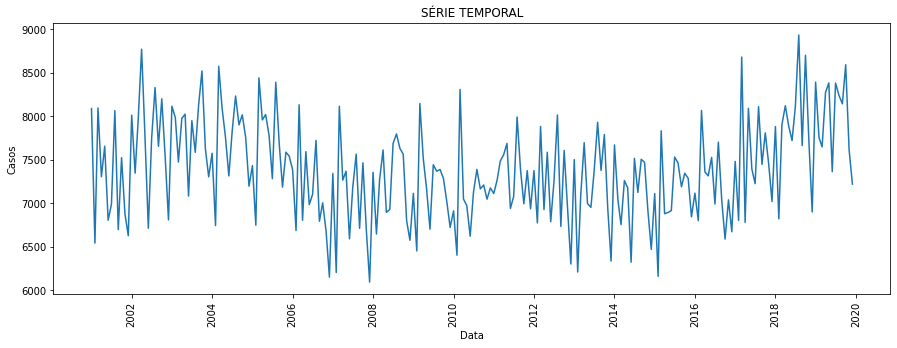

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot(data=dados_st_solucao,x="Data",y="Casos",)
plt.xticks(rotation=90)
plt.title("SÉRIE TEMPORAL")
plt.show()

como fica nosso dataset final

In [33]:
dados_st_solucao.head()

,Ano Diagnóstico,Mês,Casos,Data
0,2001,Jan,8088,2001-01-01
19,2001,Fev,6542,2001-02-01
38,2001,Mar,8095,2001-03-01
57,2001,Abr,7305,2001-04-01
76,2001,Mai,7656,2001-05-01
